**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Isabela Felix França

---

Engenheiro de Conhecimento: 
Daniel Campos da Silva

---


# Previsão de Tempo de Recorrência para Câncer de Mama

A probabilidade de sobrevivência de um paciente é um fator extremamente importante, inclusive para os familiares, por fornecê-lhes esperança. Já para os profissionais a análise de sobrevivência é como um fator de tempo. Quanto tempo até a
ocorrência de um evento ou o risco de ocorrência de um
evento por unidade de tempo. 

Diversos fatores podem influenciar a estabilidade de um paciente. Para o pior dos casos, levando este a óbito.

Desejamos desenvolver uma ferramenta para auxiliar médicos e hospitais no diagnóstico, tratamento e logística envolvidos ao lidar com casos de câncer de mama, através de uma previsão de recorrência ou não da doença, e em quanto tempo.

# Dados

Utilizamos o conjunto de dados [Breat Cance Wisconcin (Prognostic)](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29), contendo diversos casos de câncer de mama. Todos os pacientes foram atendidos entre 1984 e 1995 pelo Dr. W. H. Wolberg e possuíram câncer de mama invasivo sem evidência de metástase ao longo do diagnóstico.

Para cada paciente foi feita uma análise da imagem gerada pela coleta por FNA (fine needle aspirate), utilizando a método MSM-T(Multisurface Method-Tree), para descrever as características dos núcleos das células cancerígenas coletadas.

Os atributos de cada paciente estão divididos em:
   * *Sample code number*/ID da amostra
   * *Clump Thickness*/Espessura do aglomerado 
   * *Uniformity of Cell Size*/Uniformidade do Tamanho da Célula
   * *Uniformity of Cell Shape*/Uniformidade da Forma da Célula
   * *Marginal Adhesion*/Adesão Marginal
   * *Single Epithelial Cell Size*/Tamanho de célula epitelial única
   * *Bare Nuclei*/Núcleos nus
   * *Bland Chromatin*/Cromatina suave
   * *Normal Nucleoli*/Nucléolos normais
   * *Mitoses*/Mitoses
   * *Class*/Classe

Logicamente, não há influência no diagnóstico de um novo paciente saber qual é a sua ID, portanto, podemos descartar esse campo. Além disso, o atributo de compactação é redundante, pois depende do perímetro e da área, logo pode ser removido também.

# Método de Solução por Máquinas de Vetores

Baseadas na teoria do aprendizado estatístico, as máquinas de vetores de suporte (SVMs) são técnicas de inteligência artificial utilizadas principalmente para classificar dados (mas também há usos para problemas de previsão de um valor real). Essa classificação é feita através de funções que traçam hiperplanos (para dados em 2D representamos com linhas) separando os objetos de cima e de baixo. Abaixo está um exemplo dessa separação. Note que os objetos mais próximos da margem estão a uma distância de 1 dela. Esses objetos dão nome à técnica: são chamados de vetores de suporte.

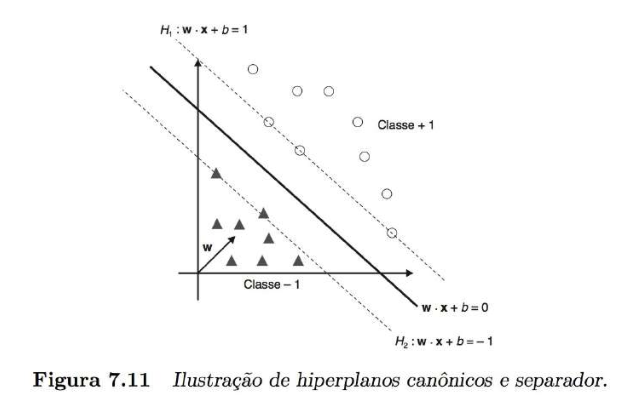

Perceba que há uma "margem" entre o hiperplano traçado pela SVM e os objetos mais próximos. Chamamos esse tipo de SVM de SVM com margens rígidas, pois separa definitivamente grupos de dados. Entretanto, nem todo grupo de dados pode ser separado tão rigidamente assim, pois pode levar a uma classificação muito ajustada aos dados de treinamento da inteligência artificial, que tem pouca utilidade ao ser generalizada para outros casos. Para lidar com esse problema, utilizamos SVMs de margem suave, que permitem alguns "erros" de classificação, como dizer que um triângulo é um círculo ou vice-versa, como no exemplo abaixo.

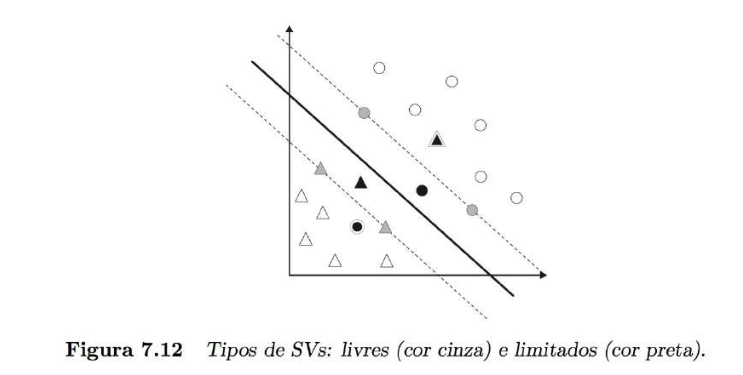

Mesmo com essa flexibilidade, ainda há problemas não linearmente separáveis, ou seja, que não podemos traçar hiperplanos separando os conjuntos de dados. Na figura abaixo, uma função que separa os dados tem a forma de um círculo, não uma reta.

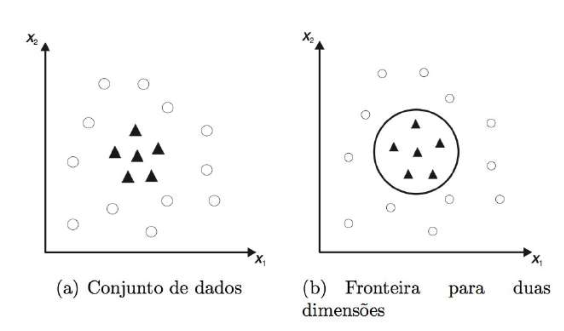

Esse problema pode ser resolvido através de transformações que levam esses dados a mais dimensões que as suas originais. Chamamos essas transformações de Kernel. Existem vários Kernels possíveis, mas os mais utilizados são o RBF, o polinomial e o Sigmoidal, todos possuindo parâmetros que podem ser ajustados. Um possível Kernel levaria os dados anteriores a uma projeção 3D, em que aqueles dentro do círculo são puxados mais para trás. Agora, esse campo 3D pode ser cortado por um hiperplano (que para o caso 3D é representado por uma "folha de papel"), portanto, separado por uma SVM. O exemplo abaixo resolve esse problema.

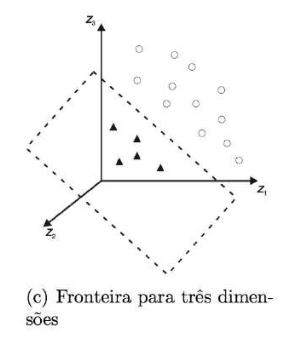

Com isso, após termos a base de dados já tratada, a configuração definida pelo engenheiro de conhecimento se concentra, principalmente, na escolha de um Kernel, seus parâmetros e uma taxa de erros.

# Implementação do método

Utilizamos uma das principais bibliotecas de inteligência artificial utilizadas em pesquisas e na indústria, SciKit Learn, para implementar nossa solução por SVM. Como nosso problema é de classificiação, estão disponíveis três classes de SVM:

* **SVC**: uma SVM geral. 
* **NuSVC**: semelhante à SVC, porém com um parâmetro para controlar a quantidade de vetores de suporte.
* **LinearSVC**: semelhante à SVC, porém utiliza um Kernel linear próprio.

Decidimos utilizar a classe SVC por ser mais robusta que a LinearSVC e o controle de quantidade de vetores de suporte não ser exatamente um parâmetro que afete tanto nossa resolução do problema. Focamos em experimentar Kernels polinomiais, RBF e sigmoidais com parâmetros diferentes e comparar suas eficácias em classificar o conjunto de dados.